# Importación modulos y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

import funciones as f

matplotlib.style.use('ggplot')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory = False, keep_default_na = False, na_values = '')
data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio,cox1-lsu
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,LU,1,AA
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,LU,1,HG
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,LU,1,NaN
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,LU,0,NaN
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,LU,1,NaN


# Exploración y limpieza de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       1688 non-null   int64  
 1   Individuo  1688 non-null   int64  
 2   AE         1688 non-null   float64
 3   LE         1688 non-null   float64
 4   AT         1688 non-null   float64
 5   LT         1688 non-null   float64
 6   AA         1688 non-null   float64
 7   LA         1688 non-null   float64
 8   NV         1688 non-null   float64
 9   Morfotipo  1688 non-null   object 
 10  Labio      1688 non-null   int64  
 11  cox1-lsu   106 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 158.4+ KB


In [4]:
# No hay individuos juveniles en el dataset (ancho total menor a 8 milímetros o ausencia de labio)

len(np.logical_or(data.Labio == 1, data.AT >= 8)) == len(data)

True

In [5]:
# Creación de diccionario y reemplazo de haplotipos combinados (105) por haplogrupos (3)
ht = ['AA', 'AB', 'BA', 'CA', 'DA', 'EA', 'FA', 'LA', 'NA', 'OA', 'JH', 'KI', 'GC', 'GD', 'GE', 'GF', 'HG', 'IG', 'MG']
hg = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2']
hg_ht_rep = dict(zip(ht, hg))

data["haplogrupos"] = data["cox1-lsu"].replace(hg_ht_rep)

In [6]:
data.iloc[:,2:-3].describe()

,AE,LE,AT,LT,AA,LA,NV
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,6.242690,1.763626,13.268957,9.778969,7.692814,6.264846,5.144419
std,0.981426,0.376717,1.942482,1.436368,1.234036,0.914297,0.298324
min,3.120000,0.680000,8.020000,6.050000,4.710000,4.210000,4.000000
25%,5.577500,1.500000,11.777500,8.760000,6.787500,5.600000,4.950000
50%,6.240000,1.760000,13.195000,9.695000,7.590000,6.140000,5.175000
75%,6.892500,2.030000,14.602500,10.845000,8.560000,6.800000,5.340000
max,9.070000,3.150000,19.130000,14.460000,11.970000,9.770000,5.970000


In [7]:
round(data['Morfotipo'].value_counts(normalize = True)*100, 2)
data['haplogrupos'].value_counts()
data['cox1-lsu'].value_counts()

LU    86.02
LB    13.27
DU     0.71
Name: Morfotipo, dtype: float64

0    85
2    12
1     9
Name: haplogrupos, dtype: int64

AA    68
HG    10
BA     3
GC     3
LA     3
GF     3
OA     2
CA     2
GE     2
MG     1
JH     1
GD     1
EA     1
KI     1
NA     1
AB     1
IG     1
FA     1
DA     1
Name: cox1-lsu, dtype: int64

In [8]:
data = pd.get_dummies(data, columns = ["Morfotipo"], drop_first = True)
data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,cox1-lsu,haplogrupos,Morfotipo_LB,Morfotipo_LU
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,AA,0,0,1
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,HG,2,0,1
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,NaN,NaN,0,1
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,NaN,NaN,0,1
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,NaN,NaN,0,1


### Creación columnas nuevas

In [9]:
# Ratios
# Cada parte sobre sí misma
data["Ratio_LE_AE"] = data["LE"]/data["AE"] # Espira
data["Ratio_LT_AT"] = data["LT"]/data["AT"] # Total
data["Ratio_LA_AA"] = data["LA"]/data["AA"] # Abertura

# Espira / Total
data["Ratio_LE_LT"] = data["LE"]/data["LT"] # Largo
data["Ratio_AE_AT"] = data["AE"]/data["AT"] # Ancho

# Abertura / Total
data["Ratio_LA_LT"] = data["LA"]/data["LT"] # Largo
data["Ratio_AA_AT"] = data["AA"]/data["AT"] # Ancho

# Espira / Abertura
data["Ratio_LE_LA"] = data["LE"]/data["LA"] # Largo
data["Ratio_AE_AA"] = data["AE"]/data["AA"] # Ancho

data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,...,Morfotipo_LU,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,...,1,0.366776,0.747684,0.860321,0.212583,0.433357,0.663489,0.576622,0.320402,0.751545
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,...,1,0.261101,0.713672,0.918495,0.177108,0.484093,0.706024,0.548581,0.250853,0.882445
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,...,1,0.288274,0.722585,0.742092,0.177889,0.445897,0.613065,0.596950,0.290164,0.746959
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,...,1,0.333333,0.785593,0.754573,0.237325,0.559322,0.533981,0.555932,0.444444,1.006098
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,...,1,0.369028,0.755764,0.849034,0.213537,0.437320,0.670162,0.596542,0.318634,0.733092


In [10]:
# Powers
potencia = 4

# Espira
data["Power_LE"] = data["LE"] ** potencia # Largo
data["Power_AE"] = data["AE"] ** potencia # Ancho

# Total
data["Power_LT"] = data["LT"] ** potencia # Largo
data["Power_AT"] = data["AT"] ** potencia # Ancho

# Abertura
data["Power_LA"] = data["LA"] ** potencia # Largo
data["Power_AA"] = data["AA"] ** potencia # Ancho

# Número de vueltas
data["Power_NV"] = data["NV"] ** potencia

data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,...,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA,Power_LE,Power_AE,Power_LT,Power_AT,Power_LA,Power_AA,Power_NV
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,...,0.576622,0.320402,0.751545,24.729734,1366.514729,12108.823608,38746.339913,2346.588611,4283.453794,777.205187
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,...,0.548581,0.250853,0.882445,4.669489,1004.693470,4745.832100,18294.428998,1179.208128,1656.848179,610.134461
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,...,0.596950,0.290164,0.746959,9.815062,1421.259840,9801.495006,35953.051846,1384.584100,4565.488679,681.841766
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,...,0.555932,0.444444,1.006098,23.425600,1897.473600,7384.463302,19387.777600,600.372506,1851.890729,875.781161
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,...,0.596542,0.318634,0.733092,25.176310,1357.546656,12108.823608,37115.717839,2442.425357,4700.254211,783.109853


In [11]:
# Power_ratios
# (Cada parte sobre sí misma) ** potencia
data["Power_Ratio_LE_AE"] = data["Ratio_LE_AE"] ** potencia # Espira
data["Power_Ratio_LT_AT"] = data["Ratio_LT_AT"] ** potencia # Total
data["Power_Ratio_LA_AA"] = data["Ratio_LA_AA"] ** potencia # Abertura

# (Espira / Total) ** potencia
data["Power_Ratio_LE_LT"] = data["Ratio_LE_LT"] ** potencia # Largo
data["Power_Ratio_AE_AT"] = data["Ratio_AE_AT"] ** potencia # Ancho

# (Abertura / Total) ** potencia
data["Power_Ratio_LA_LT"] = data["Ratio_LA_LT"] ** potencia # Largo
data["Power_Ratio_AA_AT"] = data["Ratio_AA_AT"] ** potencia # Ancho

# (Espira / Abertura) ** potencia
data["Power_Ratio_LE_LA"] = data["Ratio_LE_LA"] ** potencia # Largo
data["Power_Ratio_AE_AA"] = data["Ratio_AE_AA"] ** potencia # Ancho

In [12]:
data.columns

Index(['Lote', 'Individuo', 'AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Labio',
       'cox1-lsu', 'haplogrupos', 'Morfotipo_LB', 'Morfotipo_LU',
       'Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT',
       'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA',
       'Ratio_AE_AA', 'Power_LE', 'Power_AE', 'Power_LT', 'Power_AT',
       'Power_LA', 'Power_AA', 'Power_NV', 'Power_Ratio_LE_AE',
       'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT',
       'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT',
       'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA'],
      dtype='object')

### Relación entre variables

In [13]:
Medidas = ['AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Morfotipo_LB', 'Morfotipo_LU']
Ratios = ['Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT', 'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA', 'Ratio_AE_AA', 'Morfotipo_LB', 'Morfotipo_LU']
Powers = ['Power_LE', 'Power_AE', 'Power_LT', 'Power_AT', 'Power_LA', 'Power_AA', 'Power_NV', 'Morfotipo_LB', 'Morfotipo_LU']
Powers_ratios = ['Power_Ratio_LE_AE', 'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT', 'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT', 'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA', 'Morfotipo_LB', 'Morfotipo_LU']
Todo = Medidas + Ratios + Powers + Powers_ratios
Todo = list(dict.fromkeys(Todo)) #para eliminar elementos duplicados de una lista
print(Todo)

['AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Morfotipo_LB', 'Morfotipo_LU', 'Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT', 'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA', 'Ratio_AE_AA', 'Power_LE', 'Power_AE', 'Power_LT', 'Power_AT', 'Power_LA', 'Power_AA', 'Power_NV', 'Power_Ratio_LE_AE', 'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT', 'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT', 'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA']


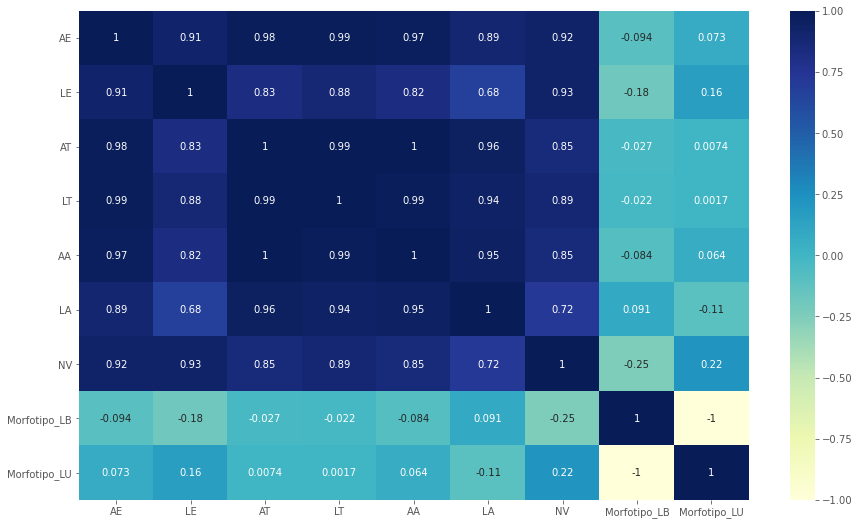

In [14]:
#variables originales del dataset
f._print_matriz_correlacion(data[Medidas].corr())

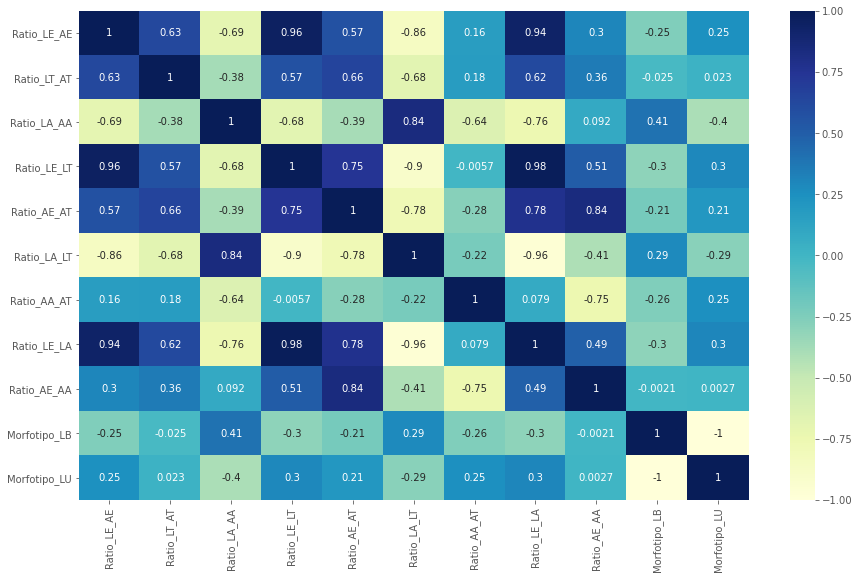

In [15]:
#variables originales del dataset
f._print_matriz_correlacion(data[Ratios].corr())

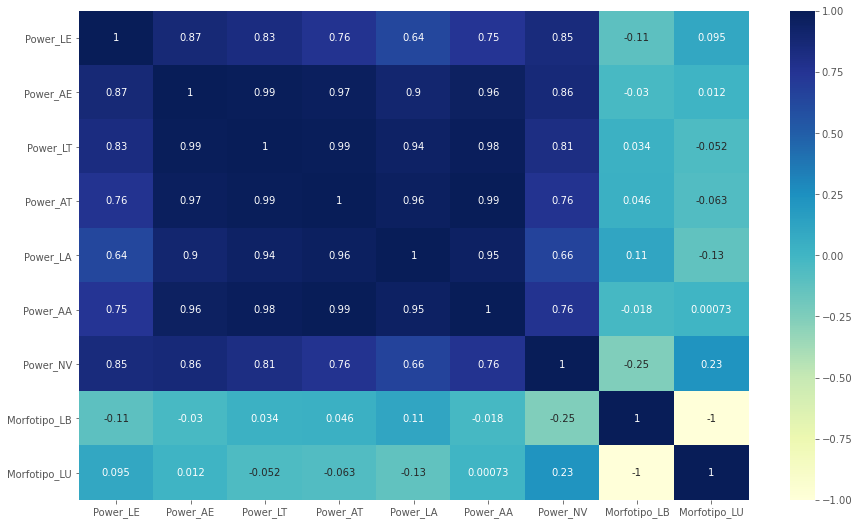

In [16]:
#variables originales del dataset
f._print_matriz_correlacion(data[Powers].corr())

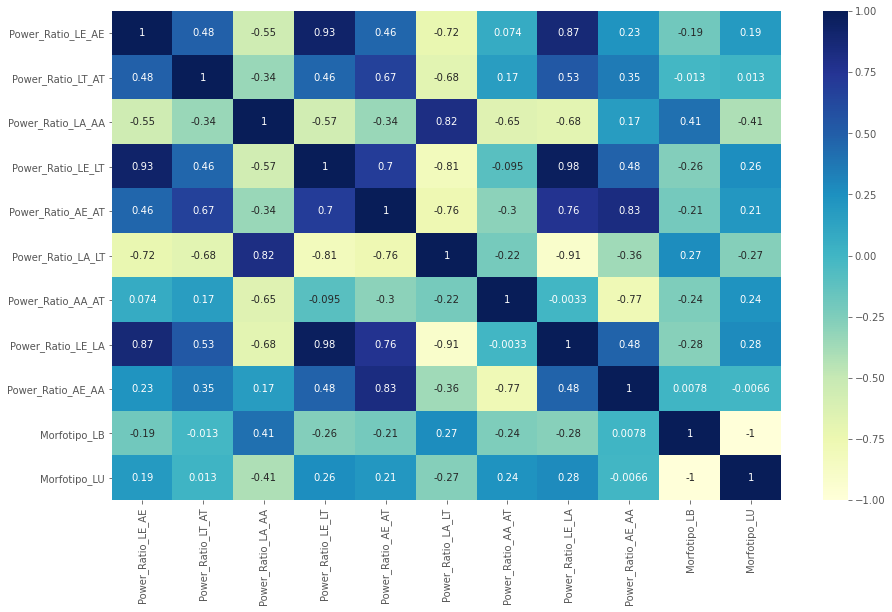

In [17]:
#variables originales del dataset
f._print_matriz_correlacion(data[Powers_ratios].corr())

In [18]:
# sns.pairplot(data=data,x_vars = Medidas,\
#          y_vars= Medidas,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [19]:
# sns.pairplot(data=data,x_vars = Ratios,\
#          y_vars= Ratios,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [20]:
# sns.pairplot(data=data,x_vars = Powers,\
#          y_vars= Powers,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [21]:
# sns.pairplot(data=data,x_vars = Powers_ratios,\
#          y_vars= Powers_ratios,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [22]:
#sns.pairplot(data=data,x_vars = Todo,\
#         y_vars= Todo,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

### Distribución de las observaciones

In [23]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 9))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  
    plt.show()

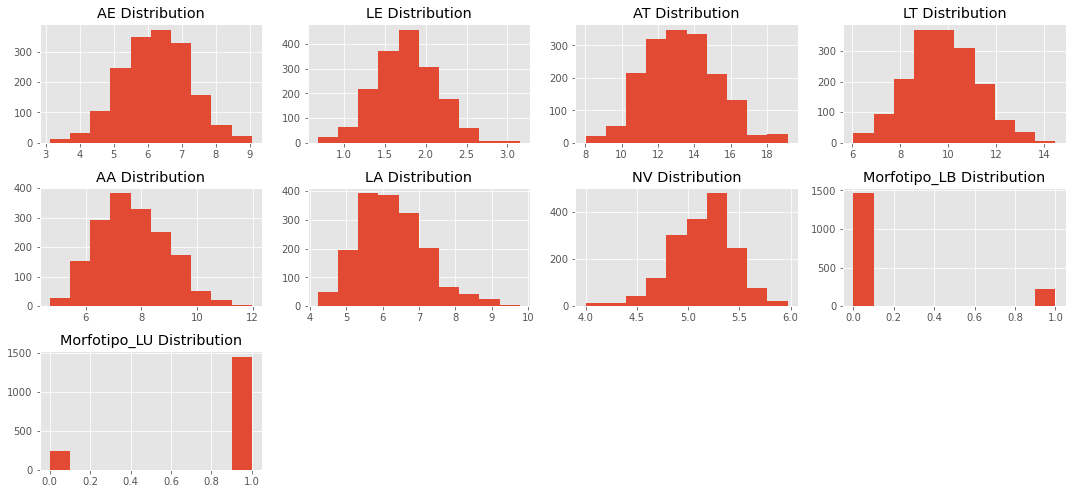

In [24]:
draw_histograms(data, data[Medidas], 4, 4)

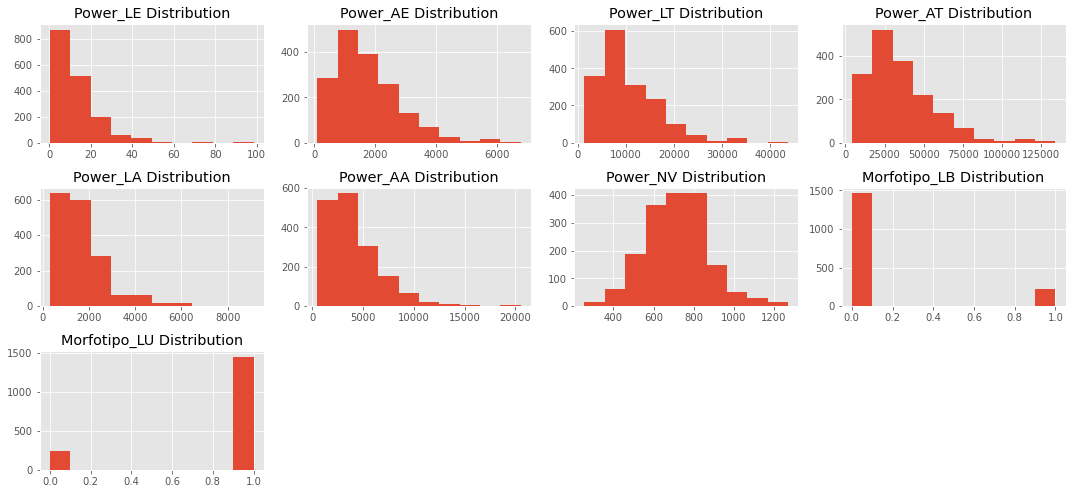

In [25]:
draw_histograms(data, data[Powers], 4, 4)

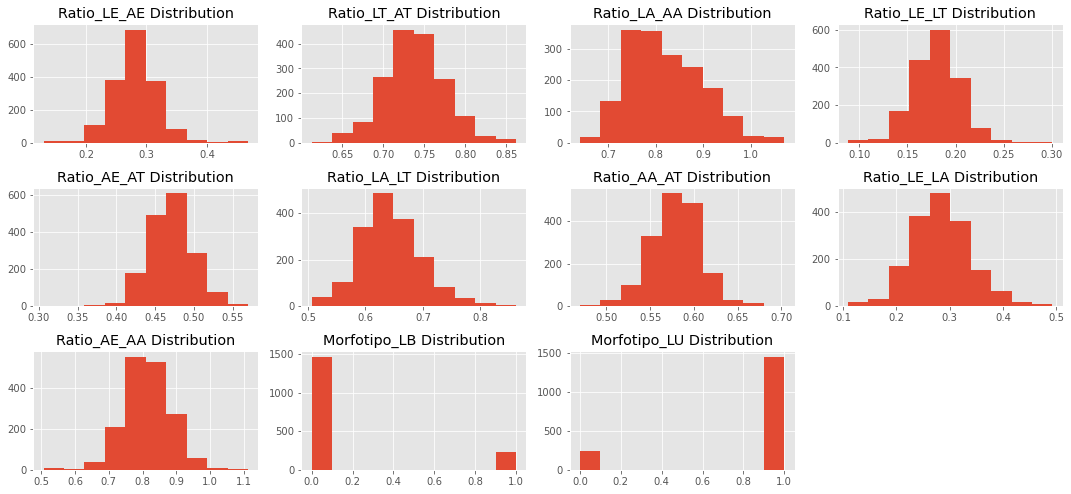

In [26]:
draw_histograms(data, data[Ratios], 4, 4)

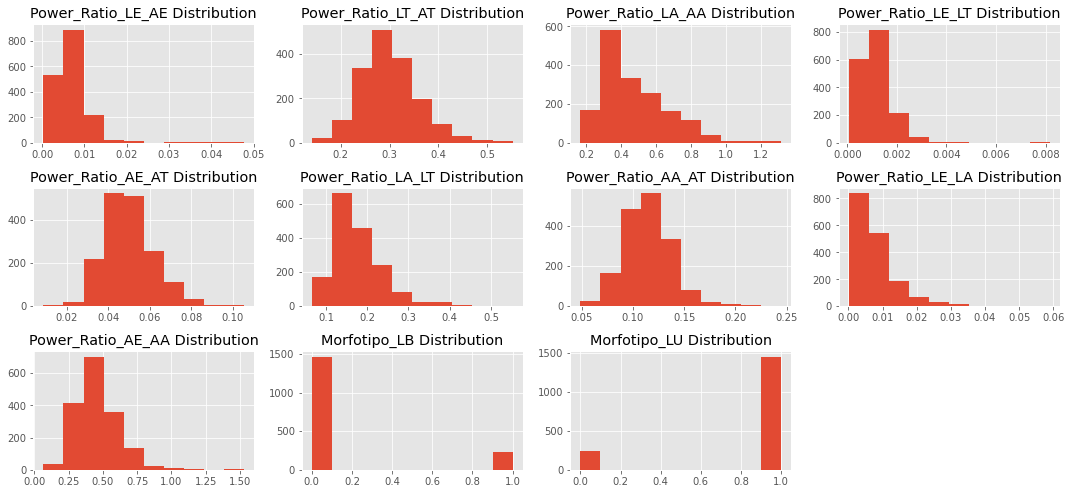

In [27]:
draw_histograms(data, data[Powers_ratios], 4, 4)

# Modelos de clustering

## Importación modulos y dataset

In [28]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabasz_score
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.cm as cm

## Prueba Kmeans

### Con las variables originales

In [29]:
x1 = data[Medidas]
x2 = data[Powers]
x3 = data[Ratios]
x4 = data[Powers_ratios]
x5 = data[Todo]
y_true = data["haplogrupos"]

scaler = StandardScaler()
x1_scaled=scaler.fit_transform(x1)
x2_scaled=scaler.fit_transform(x2)
x3_scaled=scaler.fit_transform(x3)
x4_scaled=scaler.fit_transform(x4)
x5_scaled=scaler.fit_transform(x5)


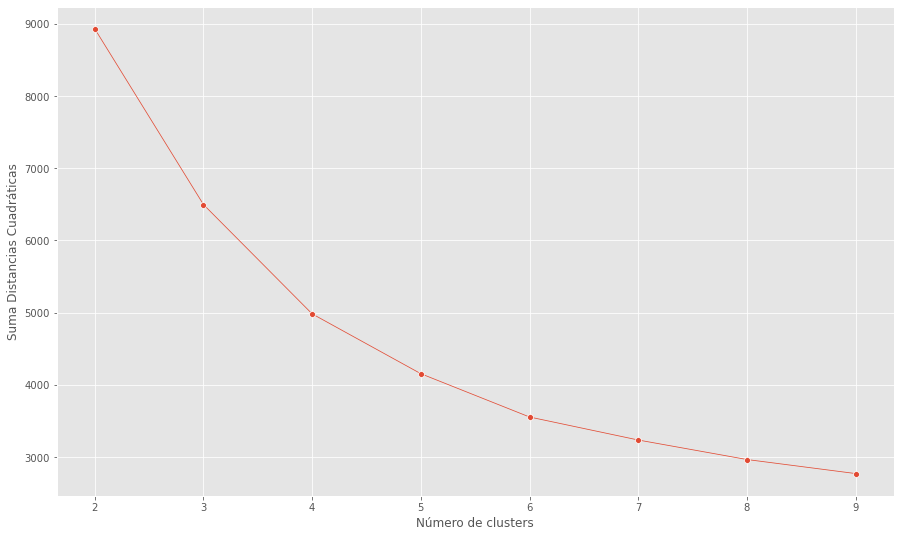

In [30]:
#x1_scaled medidas
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x1_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

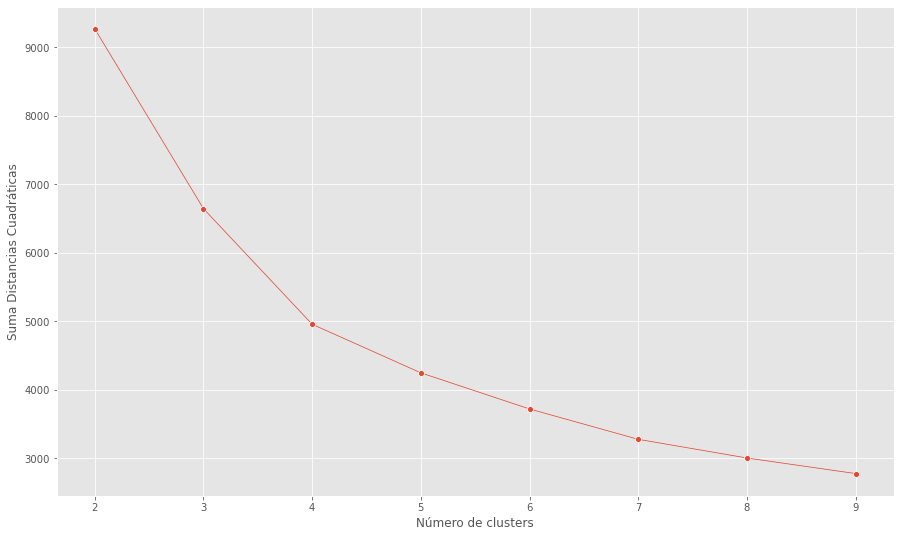

In [31]:
#x2_scaled powers
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x2_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

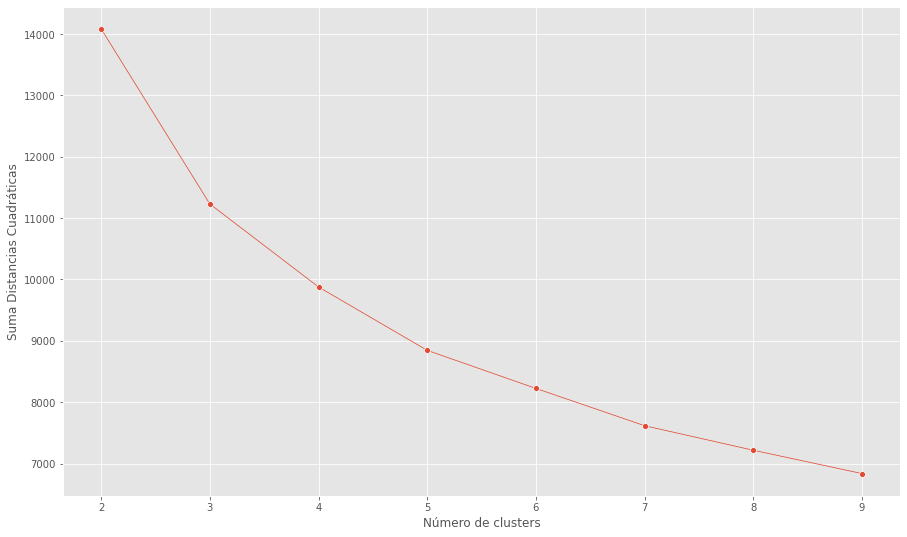

In [32]:
#x3_scaled ratios
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x3_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

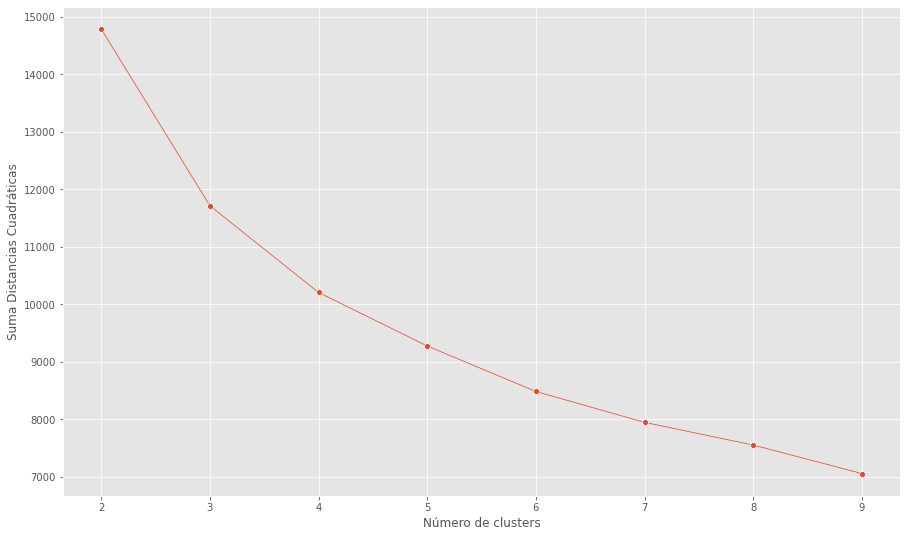

In [33]:
#x4_scaled powers ratios
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x4_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

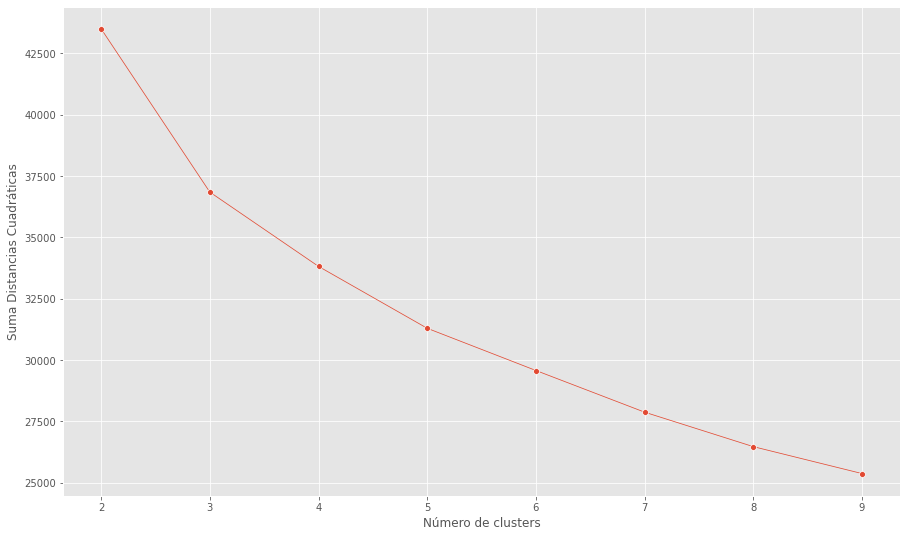

In [34]:
#x5_scaled todo
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x5_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

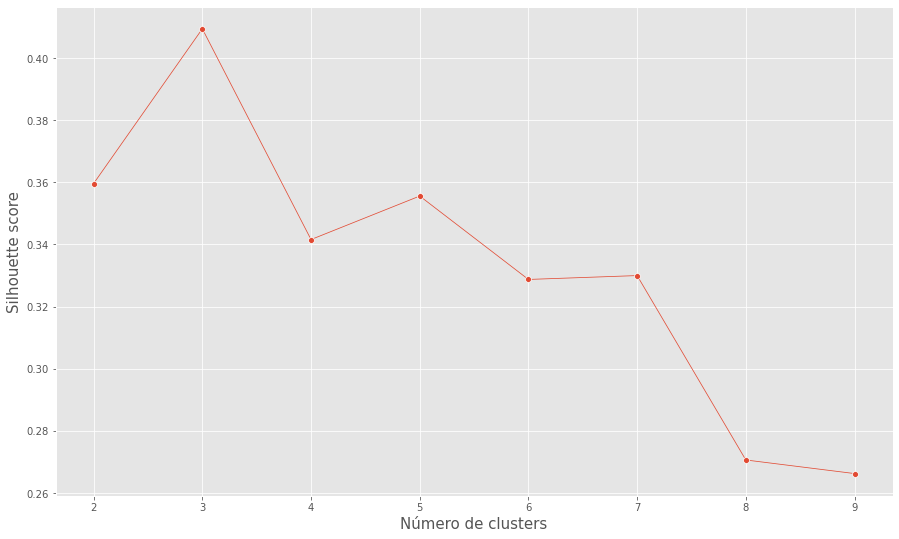

In [35]:
#x1_scaled medidas
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x1_scaled)
    score=silhouette_score(x1_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

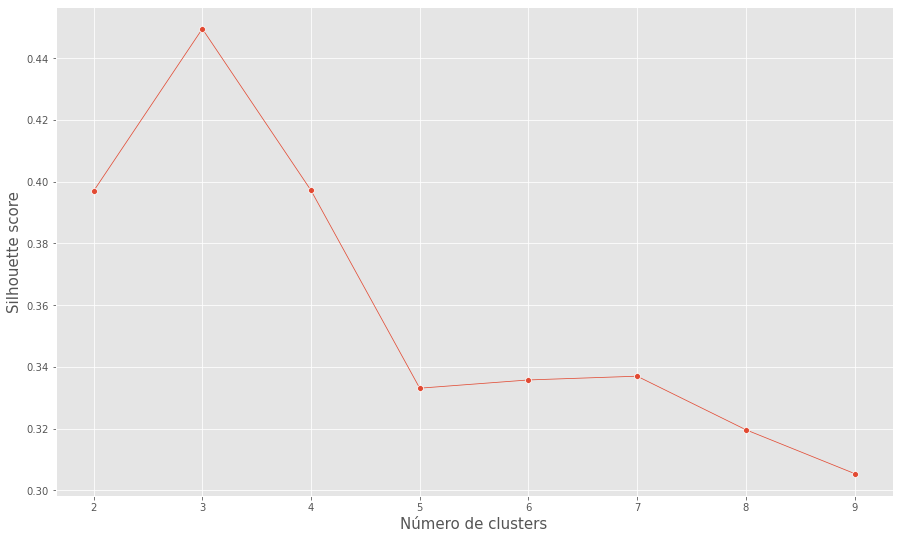

In [36]:
#x2_scaled powers
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x2_scaled)
    score=silhouette_score(x2_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

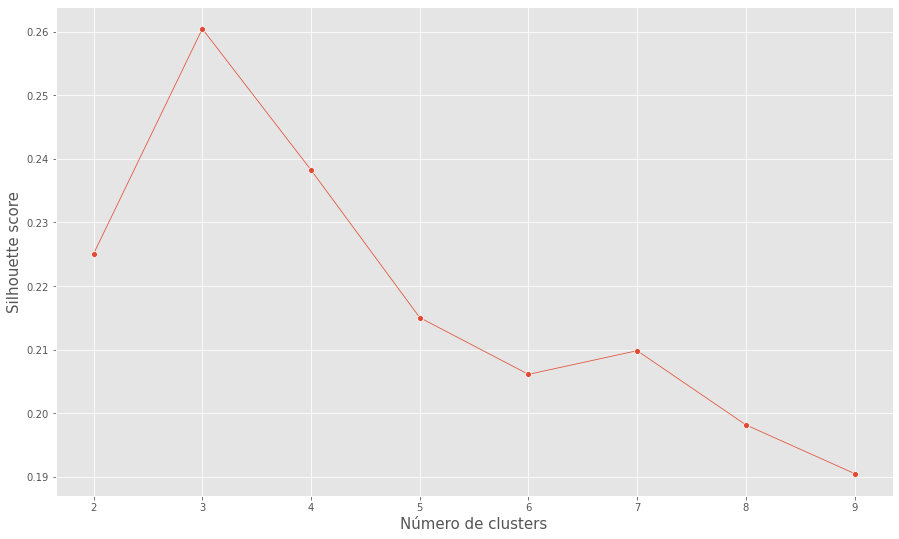

In [37]:
#x3_scaled ratios
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x3_scaled)
    score=silhouette_score(x3_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

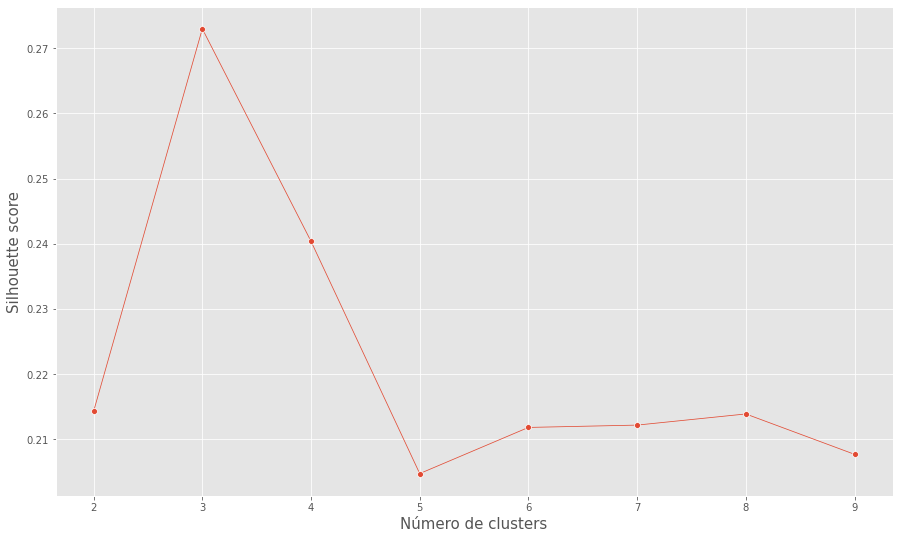

In [38]:
#x4_scaled power ratios
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x4_scaled)
    score=silhouette_score(x4_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

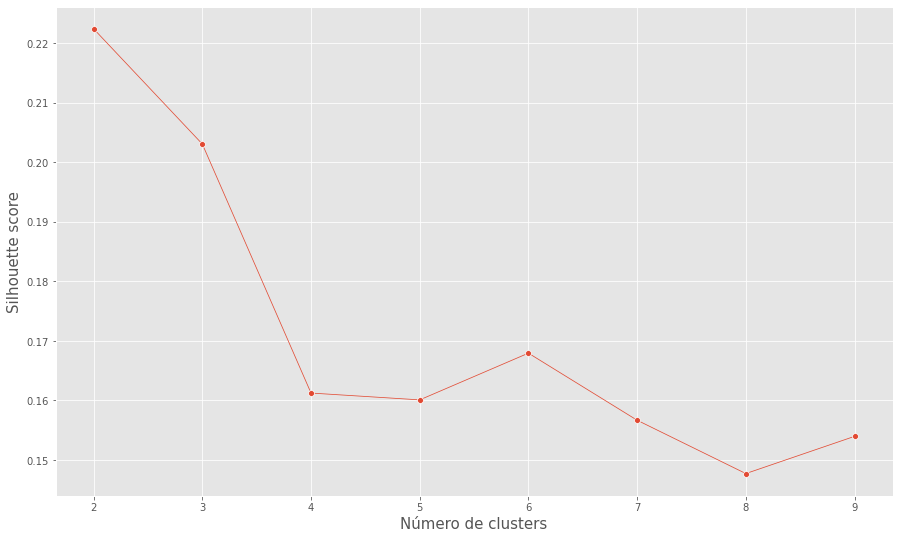

In [39]:
#x5_scaled todo
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x5_scaled)
    score=silhouette_score(x5_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

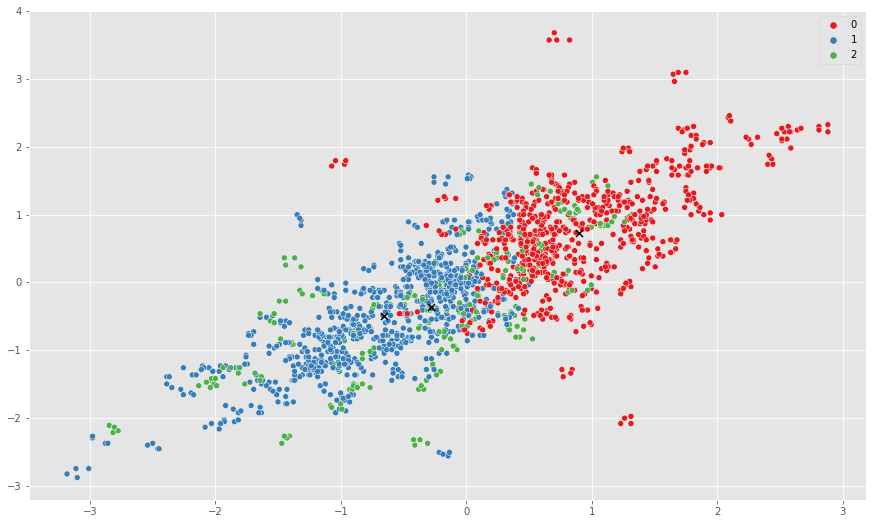

In [40]:
#x1_scaled medidas
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x1_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x1_scaled[:,0],y=x1_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

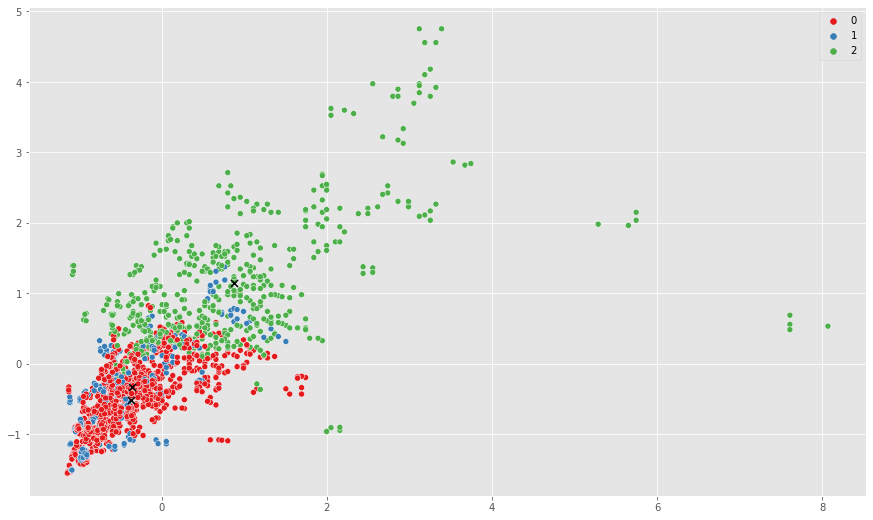

In [41]:
#x2_scaled powers
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x2_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x2_scaled[:,0],y=x2_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

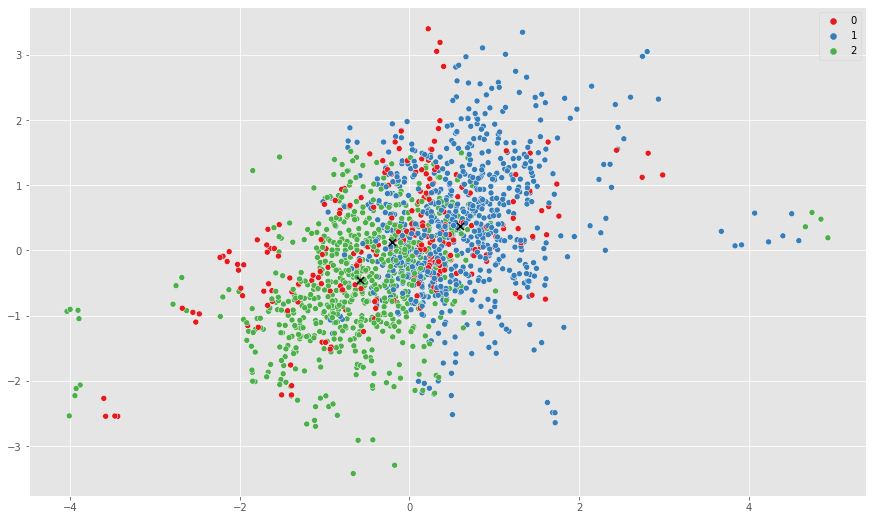

In [42]:
#x3_scaled ratios
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x3_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x3_scaled[:,0],y=x3_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

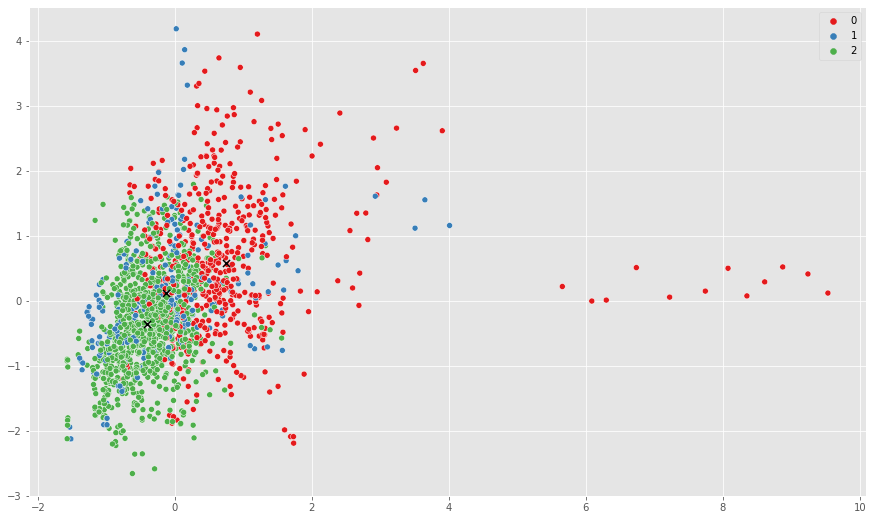

In [43]:
#x4_scaled powers ratios
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x4_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x4_scaled[:,0],y=x4_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

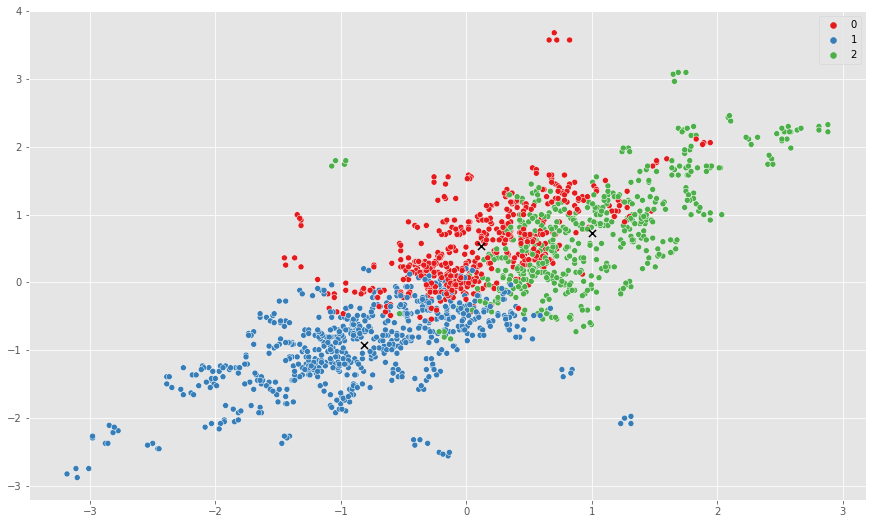

In [44]:
#x5_scaled todo
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x5_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x5_scaled[:,0],y=x5_scaled[:,1],hue=labels,legend='full', palette="Set1");

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

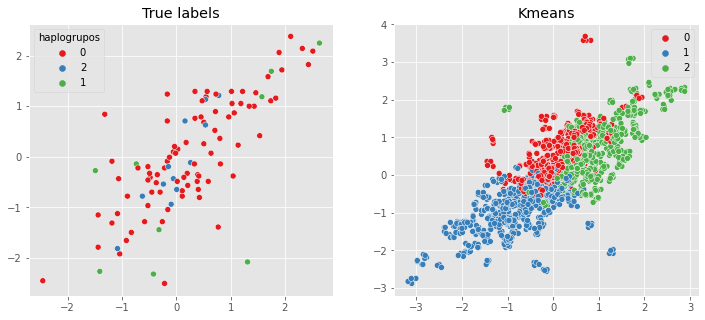

In [45]:
#x1_scaled medidas
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

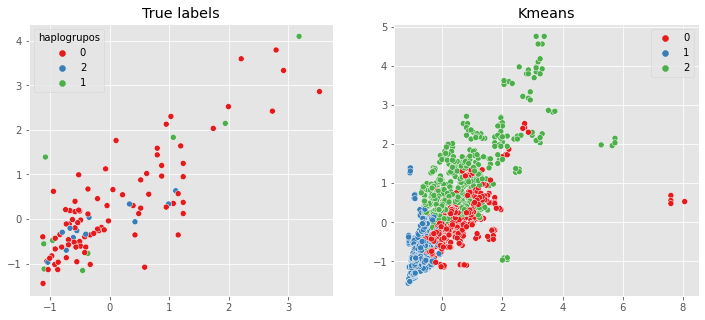

In [46]:
#x2_scaled powers
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

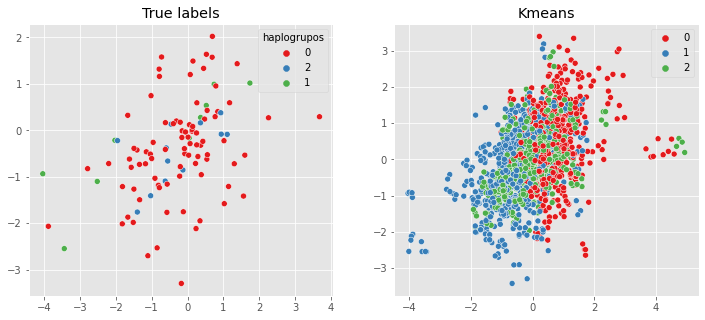

In [47]:
#x3_scaled ratios
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

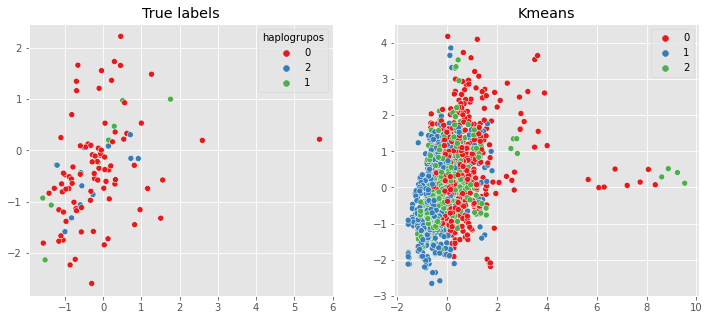

In [48]:
#x4_scaled powers ratios
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

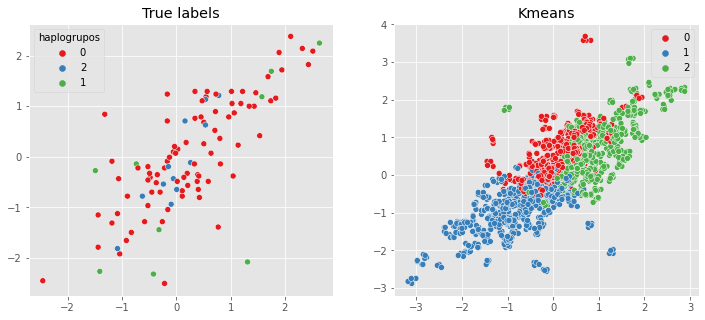

In [49]:
#x5_scaled todos
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')



<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

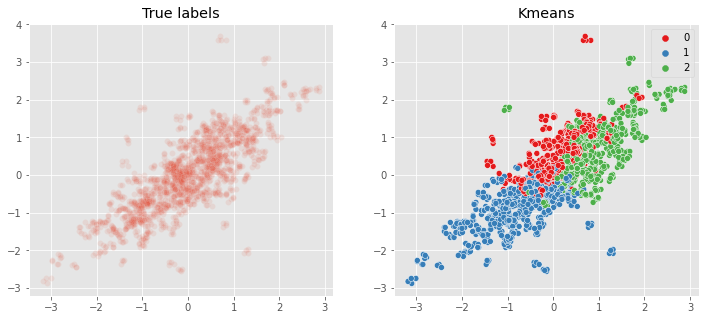

In [50]:
#x5_scaled todos (agregamos alpha)
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],ax=ax[0], alpha=0.1)
#sns.scatterplot(x = x_scaled[indices,0], y = x_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

In [51]:
#definir indices
#indices = y_true[y_true!="0"].index

In [52]:
#f,ax=plt.subplots(1,2,figsize=(12,5))
#sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
#ax[0].set_title('True labels')

In [53]:
#x_scaled.shape
#x_scaled[indices].shape

In [54]:
#x_scaled[indices,0]

In [55]:
#x_scaled[indices,1]

In [56]:
#y_true[y_true!="0"]

In [57]:
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f");

#print(classification_report(y_true,labels))

## DBSCAN

In [58]:
from scipy.spatial.distance import pdist,squareform

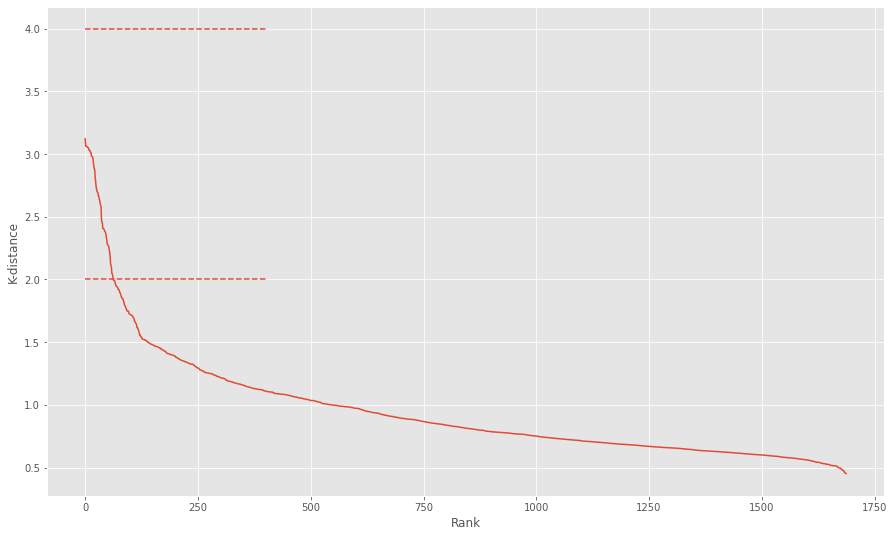

In [59]:
#x1_scaled medidas
minPts=20;
k=minPts-1;

D=squareform(pdist(x1_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

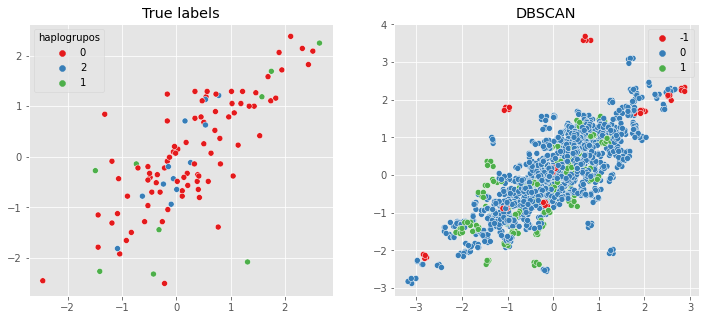

In [60]:
#x1_scaled medidas
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x1_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');


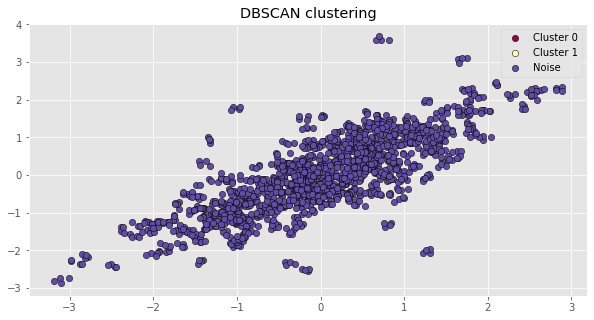

In [61]:
#x1_scaled medidas
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x1_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x1_scaled[labels==l,0], x1_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x1_scaled[labels==l,0], x1_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');
    

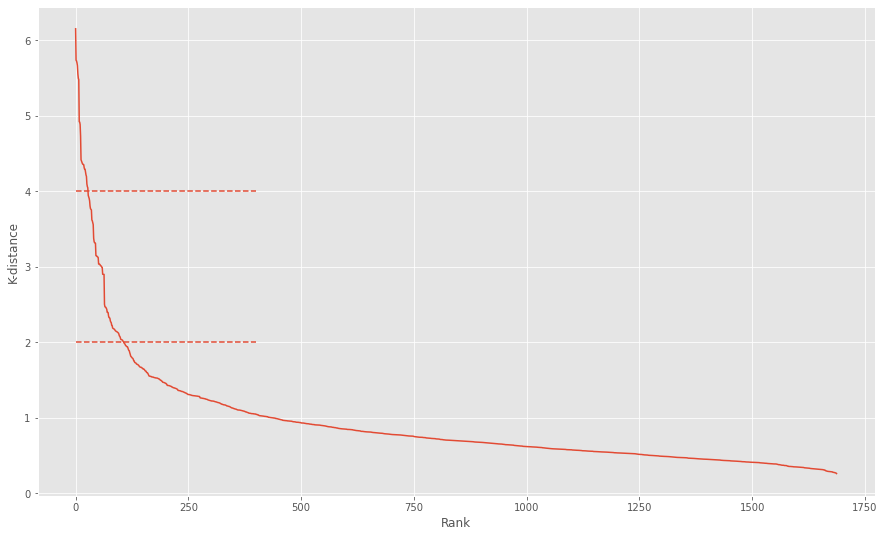

In [62]:
#x2_scaled powers
minPts=20;
k=minPts-1;

D=squareform(pdist(x2_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

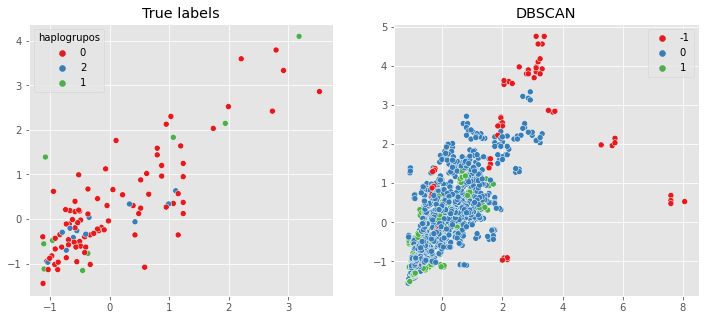

In [63]:
#x2_scaled powers
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x2_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

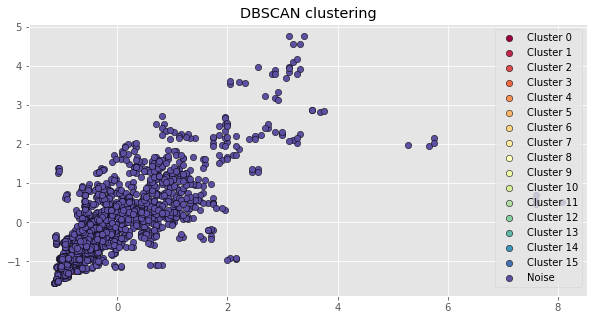

In [64]:
#x2_scaled medidas
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x2_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x2_scaled[labels==l,0], x2_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x2_scaled[labels==l,0], x2_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

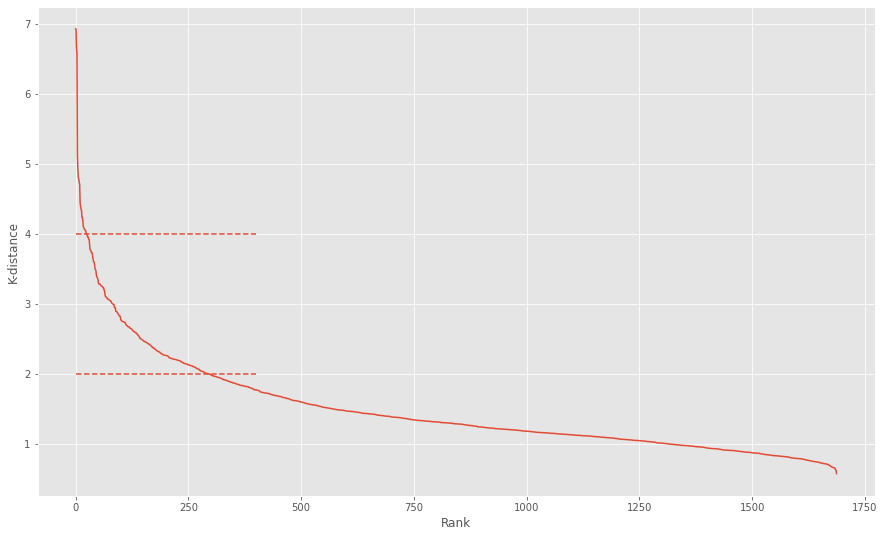

In [65]:
#x3_scaled ratios
minPts=20;
k=minPts-1;

D=squareform(pdist(x3_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

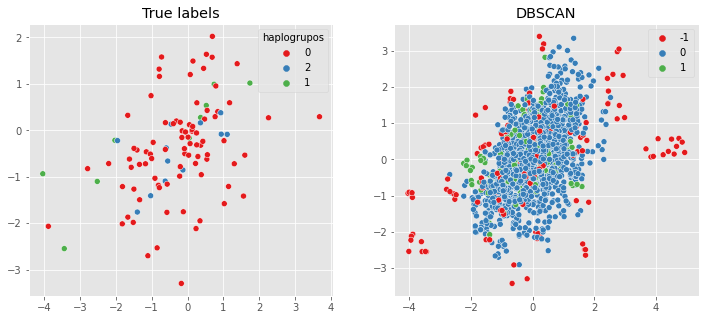

In [66]:
#x3_scaled ratios
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x3_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

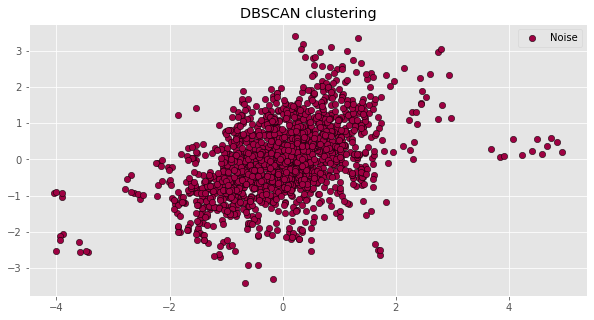

In [67]:
#x3_scaled ratios
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x3_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x3_scaled[labels==l,0], x3_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x3_scaled[labels==l,0], x3_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

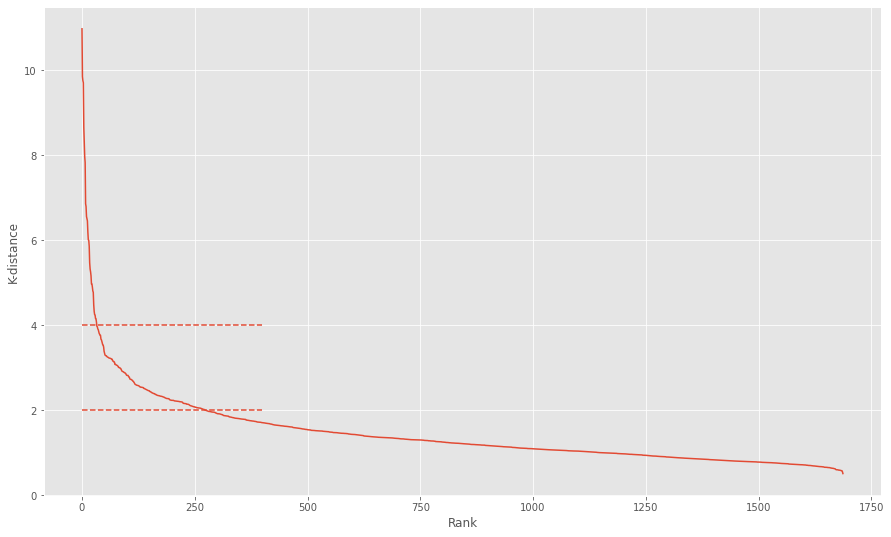

In [68]:
#x4_scaled power ratios
minPts=20;
k=minPts-1;

D=squareform(pdist(x4_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

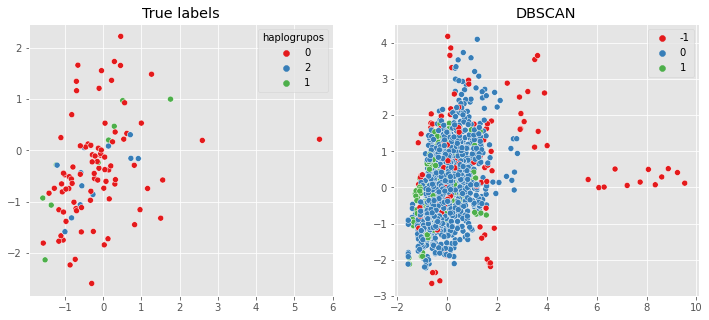

In [69]:
#x4_scaled power ratios
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x4_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

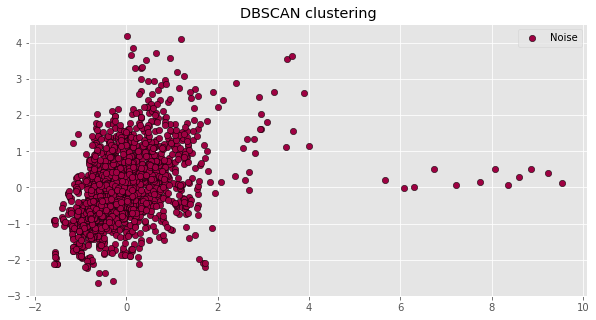

In [70]:
#x4_scaled powers ratios
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x4_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x4_scaled[labels==l,0], x4_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x4_scaled[labels==l,0], x4_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

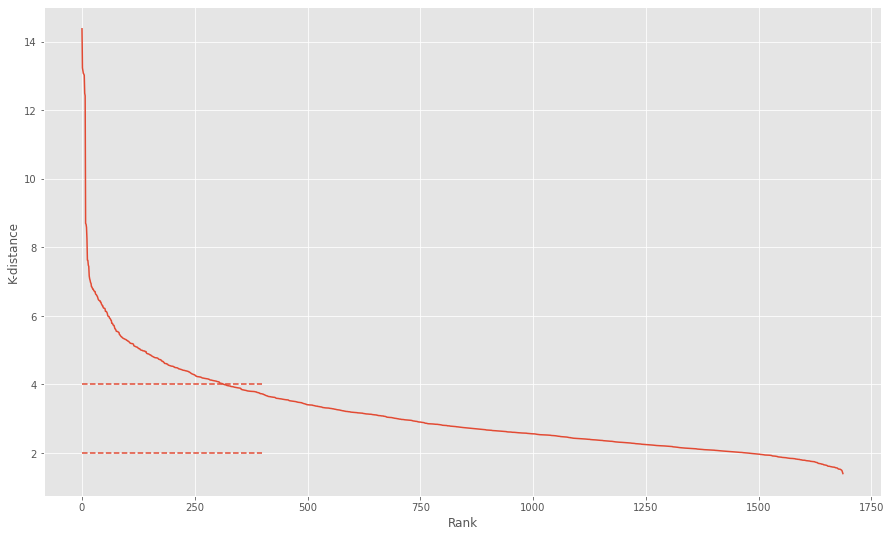

In [71]:
#x5_scaled todos
minPts=20;
k=minPts-1;

D=squareform(pdist(x5_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'DBSCAN')

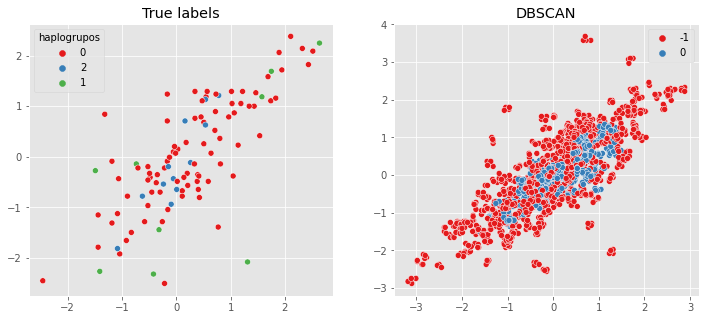

In [72]:
#x5_scaled todos
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x5_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN')

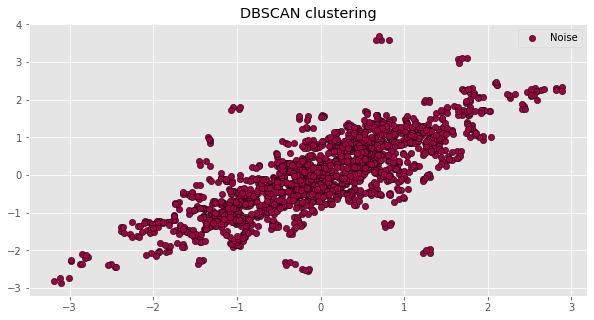

In [73]:
#x5_scaled todos
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x5_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x5_scaled[labels==l,0], x5_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x5_scaled[labels==l,0], x5_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

# Modelos reducción dimensionalidad

## Prueba PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
df_x1 = pd.DataFrame(x1_scaled)
df_x2 = pd.DataFrame(x2_scaled)
df_x3 = pd.DataFrame(x3_scaled)
df_x4 = pd.DataFrame(x4_scaled)
df_x5 = pd.DataFrame(x5_scaled)

In [76]:
pca_1 = PCA()
pca_2 = PCA()
pca_3 = PCA()
pca_4 = PCA()
pca_5 = PCA()

In [77]:
pca_1.fit(df_x1)
pca_2.fit(df_x2)
pca_3.fit(df_x3)
pca_4.fit(df_x4)
pca_5.fit(df_x5)

PCA()

PCA()

PCA()

PCA()

PCA()

### Pesos (loadings)

In [78]:
#x1 medidas
#Creamos un DataFrame con los loadings.
loadings_1 = pd.DataFrame(pca_1.components_.T, index=x1.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_1.components_.T[0]))])
loadings_1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
AE,0.401108,0.002964,-0.088953,0.050613,-0.151504,-0.795708,0.047696,0.113803,-0.396607
LE,0.336554,-0.053072,-0.604906,0.585563,0.265920,0.240136,0.213225,-0.031705,-0.016443
AT,0.401806,0.044061,0.225250,0.034191,-0.314269,-0.095487,0.432310,-0.262768,0.648754
LT,0.409534,0.045337,0.046567,0.122126,0.019045,0.008085,-0.824665,0.138649,0.336777
AA,0.391797,0.012194,0.254054,0.037390,-0.511167,0.524678,0.024623,0.086082,-0.485603
LA,0.351494,0.104381,0.524742,-0.068194,0.732193,0.057296,0.158837,0.003624,-0.144640
NV,0.344338,-0.084260,-0.461553,-0.793037,0.091453,0.140441,0.024735,-0.057488,0.019710
Morfotipo_LB,-0.021860,0.698766,-0.095491,0.006874,-0.015253,-0.012856,-0.160527,-0.667604,-0.173839
Morfotipo_LU,0.024047,-0.697682,0.105938,0.058879,0.034808,-0.039248,-0.181875,-0.664341,-0.144196


In [79]:
#x2 powers
#Creamos un DataFrame con los loadings.
loadings_2 = pd.DataFrame(pca_2.components_.T, index=x2.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_2.components_.T[0]))])
loadings_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Power_LE,0.322896,-0.050672,0.619972,0.612948,0.241434,0.233010,-0.141563,0.021776,-0.001399
Power_AE,0.405611,-0.002610,0.085529,0.036679,-0.162120,-0.816336,-0.203986,-0.287860,-0.098244
Power_LT,0.416037,0.035421,-0.060088,0.092648,-0.085528,-0.027791,0.886181,0.031751,0.138027
Power_AT,0.408467,0.044697,-0.239536,0.029140,-0.249415,0.010913,-0.302331,0.745911,0.250631
Power_LA,0.359498,0.080114,-0.444714,-0.081548,0.796900,0.037277,-0.103746,-0.099719,-0.052685
Power_AA,0.395103,0.009684,-0.285064,0.044126,-0.454935,0.497819,-0.185979,-0.468752,-0.226904
Power_NV,0.325316,-0.116999,0.497819,-0.774752,0.056067,0.163555,-0.019716,0.036762,-0.027979
Morfotipo_LB,-0.005783,0.698379,0.097095,-0.016798,-0.018276,-0.015957,0.075403,0.240337,-0.662184
Morfotipo_LU,0.008748,-0.697309,-0.105114,0.066309,0.020256,-0.046816,0.101011,0.265492,-0.644164


In [80]:
#x3 ratios
#Creamos un DataFrame con los loadings.
loadings_3 = pd.DataFrame(pca_3.components_.T, index=x3.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_3.components_.T[0]))])
loadings_3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Ratio_LE_AE,0.376385,-0.028108,0.156474,-0.225953,0.534562,0.073327,0.010336,-0.458349,0.521433,-0.040644,-0.084483
Ratio_LT_AT,0.242198,0.111639,0.148333,-0.700756,-0.287576,0.403178,0.000870,0.150030,-0.104709,-0.155710,0.335922
Ratio_LA_AA,-0.219181,0.437033,-0.203860,-0.431263,0.239438,0.028547,0.016818,0.089585,-0.185569,0.305392,-0.582461
Ratio_LE_LT,0.430695,0.047586,0.029088,0.008317,0.393402,-0.321331,0.001578,-0.080348,-0.706347,0.005423,0.218836
Ratio_AE_AT,0.339766,0.254681,-0.147273,-0.071144,-0.465429,-0.482171,-0.008662,-0.168974,0.089832,-0.442117,-0.334168
Ratio_LA_LT,-0.387550,0.123540,-0.152783,-0.286293,0.293036,-0.514066,-0.023246,0.261103,0.259953,-0.246545,0.426647
Ratio_AA_AT,0.012657,-0.493869,0.283407,-0.349293,-0.238654,-0.463392,0.011202,-0.026240,0.042148,0.522436,-0.079932
Ratio_LE_LA,0.467036,-0.016545,0.080670,0.137835,0.144065,-0.026975,-0.020326,0.801890,0.233824,0.057284,-0.182264
Ratio_AE_AA,0.235543,0.482496,-0.277948,0.146086,-0.195691,-0.064152,0.014603,-0.108614,0.227234,0.589560,0.399354
Morfotipo_LB,-0.114547,0.346054,0.591962,0.100353,-0.022647,-0.067588,-0.707628,-0.020421,-0.003113,0.019407,-0.003759


In [81]:
#x4 powers_ratios
#Creamos un DataFrame con los loadings.
loadings_4 = pd.DataFrame(pca_4.components_.T, index=x4.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_4.components_.T[0]))])
loadings_4

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Power_Ratio_LE_AE,0.349813,-0.010696,0.164267,0.555426,0.195441,0.267045,0.508952,0.404090,-0.040672,0.028464,-0.087977
Power_Ratio_LT_AT,0.256298,0.091716,0.148371,-0.289355,0.694929,0.350158,-0.277221,-0.045060,-0.167509,-0.011165,0.327959
Power_Ratio_LA_AA,-0.180986,0.468771,-0.234162,0.230675,0.396882,0.058805,-0.132632,-0.208751,0.319819,0.034220,-0.560232
Power_Ratio_LE_LT,0.437807,0.046518,0.046518,0.403211,-0.041835,-0.258207,0.005590,-0.719686,-0.049282,-0.054755,0.222691
Power_Ratio_AE_AT,0.376574,0.206934,-0.132893,-0.410242,0.100754,-0.446759,0.273099,0.067455,-0.436956,0.113759,-0.369678
Power_Ratio_LA_LT,-0.357058,0.176081,-0.192721,0.354290,0.287734,-0.520972,-0.095408,0.293147,-0.258359,-0.013089,0.403338
Power_Ratio_AA_AT,-0.018385,-0.473077,0.297163,-0.126928,0.408079,-0.460538,0.164453,-0.004607,0.504726,-0.069110,-0.078926
Power_Ratio_LE_LA,0.465966,-0.020089,0.091742,0.164134,-0.160144,-0.193388,-0.694464,0.389336,0.146124,0.029428,-0.167301
Power_Ratio_AE_AA,0.268072,0.444750,-0.283529,-0.229132,-0.123192,-0.054302,0.228621,0.172294,0.557875,-0.139172,0.408379
Morfotipo_LB,-0.118387,0.371781,0.575235,-0.036761,-0.093935,-0.071685,0.007196,0.030179,-0.105151,-0.693103,-0.095620


In [82]:
#x5 todos
#Creamos un DataFrame con los loadings.
loadings_5 = pd.DataFrame(pca_5.components_.T, index=x5.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_5.components_.T[0]))])
loadings_5

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
AE,0.254003,-0.091544,-0.113496,-0.124573,-0.033906,0.013494,-0.071963,0.066844,-0.083634,0.167778,...,0.031145,0.069440,-0.056033,0.720002,-0.082373,0.242091,-0.148328,0.260124,-0.210941,0.031266
LE,0.267482,0.067673,-0.021368,0.095232,0.085896,-0.011483,0.004416,0.019563,-0.206012,-0.048900,...,-0.176366,0.757845,-0.216917,-0.129715,0.063916,-0.243187,-0.104359,-0.039082,0.014024,-0.014786
AT,0.227831,-0.188723,-0.054268,-0.072476,0.081493,0.041455,0.064317,0.016931,-0.058884,0.266226,...,-0.042737,-0.142165,0.012343,0.045616,-0.023149,0.147200,-0.195728,-0.507471,0.588516,-0.194981
LT,0.251408,-0.134318,-0.060043,0.021599,-0.063355,0.021785,0.149836,0.021529,-0.031263,0.235123,...,-0.076597,-0.085402,-0.093693,-0.070455,-0.120824,0.004523,0.817644,0.040069,0.020242,0.085544
AA,0.227077,-0.199885,0.059642,-0.024522,-0.000313,0.009625,-0.034094,0.029122,-0.082153,0.249911,...,0.161573,-0.171647,0.025047,-0.414832,-0.558025,-0.115112,-0.309803,0.108425,-0.297242,0.034580
LA,0.166792,-0.239620,-0.156122,0.136611,-0.015416,-0.091507,-0.013287,-0.010098,-0.104115,0.306609,...,0.036636,-0.182580,0.248909,-0.164513,0.671967,-0.103706,-0.127297,0.150907,-0.150337,0.057005
NV,0.234835,-0.022431,-0.043851,-0.091262,-0.056162,-0.056031,-0.054335,-0.634026,0.055825,-0.024067,...,-0.024724,0.027450,-0.012226,0.033203,-0.024854,0.012376,0.006823,-0.000211,0.002735,-0.003273
Morfotipo_LB,-0.028217,-0.039840,-0.117614,0.213343,-0.060537,0.633342,-0.162737,-0.051822,-0.015083,0.009428,...,0.006322,-0.008186,-0.002169,-0.001984,0.008192,0.000936,-0.000478,0.000306,-0.002225,0.001815
Morfotipo_LU,0.029987,0.040446,0.113911,-0.207146,0.057396,-0.634169,0.176927,0.092143,0.025819,0.010306,...,0.006031,-0.006608,-0.002418,-0.001837,0.007588,-0.000029,-0.000911,0.000473,-0.002137,0.001794
Ratio_LE_AE,0.131178,0.217722,0.097658,0.307008,0.179981,-0.035388,0.122874,-0.058631,-0.367788,-0.124750,...,0.049825,-0.418407,-0.240327,0.300512,-0.047936,-0.459947,-0.026387,-0.084091,-0.010347,0.020013


In [50]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

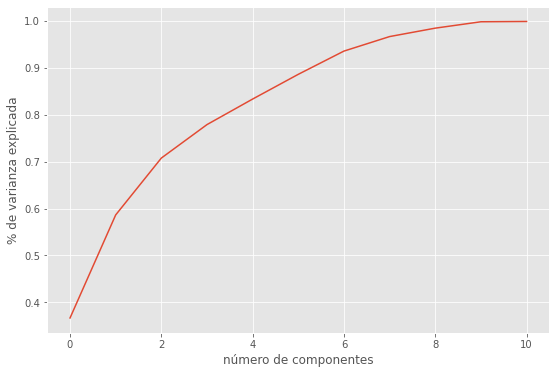

In [51]:
plot_explained_variance(components_count = 11, X = data_std)

### Proyección

In [52]:
#nuevo dataset con cada participación de feature
nuevo_data_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','CP19'])

In [ ]:
nuevo_data_pca.head(10)

In [53]:
nuevo_data_pca.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,CP19
0,0,-1.654952,0.041232,0.852522,-1.495220,2.407609,0.501458,-1.101919,0.743017,0.334190,-0.273081,-0.042585,-0.071770,-0.054358,0.045264,0.018554,-0.001530,-0.004899,-0.017238,0.010733
1,1,2.266369,0.275017,-1.568758,1.200139,0.095961,0.143741,-0.619563,1.400465,-0.308032,0.074431,-0.046082,-0.080315,0.037492,0.026670,-0.000339,-0.037749,0.008828,0.010013,-0.015736
2,2,-0.580689,-0.463650,1.700425,0.379678,0.411416,-0.268079,-0.028151,0.165189,0.590795,0.186086,-0.022117,-0.020994,-0.020796,-0.018515,0.010277,-0.005463,-0.002790,0.002817,0.000517
3,3,-2.687667,6.043109,-0.409365,0.641890,-1.220514,-0.080929,0.178352,-0.305421,-0.834300,-0.423143,0.037363,0.388258,0.047381,0.082179,0.017515,-0.036832,0.017679,-0.000227,-0.013503
4,4,1.517910,-0.539293,-2.128903,0.480474,0.448382,0.415913,-0.940084,1.375656,-0.098551,-0.171431,0.003158,-0.019950,0.030827,-0.013475,-0.000211,-0.003453,-0.018658,0.014398,-0.017333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,-0.016171,0.814758,0.956406,-0.031115,-0.511478,-0.083901,-0.252394,-0.947652,-0.225576,-0.976542,-0.039354,-0.001493,-0.020396,-0.014267,-0.011060,0.000182,-0.013548,0.008990,-0.002072
419,419,-0.962549,1.114616,0.715584,0.152147,-1.144192,0.090795,0.264571,0.984657,0.838270,-0.421341,-0.016799,-0.016839,-0.042808,-0.006770,-0.018504,-0.009672,0.023533,-0.007520,0.001719
420,420,-1.784041,2.172001,2.260421,0.848483,-0.213519,-0.429983,0.485168,0.361144,0.428217,0.110327,0.056261,0.148869,0.010918,0.016033,0.003041,0.013428,-0.053461,0.020176,0.003430
421,421,0.887922,-2.367528,2.112162,0.124820,0.043985,-0.066132,-0.176663,0.391576,0.689255,-0.951893,-0.020131,-0.003038,0.002506,-0.046604,0.052346,-0.011662,0.020724,0.007249,0.012331


In [54]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Morfotipo_2,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,0,96,1,6.11,2.22,13.95,10.39,8.19,6.99,5.30,...,0,0.363339,0.744803,0.853480,0.213667,0.437993,0.672762,0.587097,0.317597,0.746032
1,1,96,2,5.69,1.45,11.68,8.34,6.45,5.89,5.00,...,0,0.254833,0.714041,0.913178,0.173861,0.487158,0.706235,0.552226,0.246180,0.882171
2,2,96,5,6.14,1.80,13.72,10.00,8.13,6.08,5.12,...,0,0.293160,0.728863,0.747847,0.180000,0.447522,0.608000,0.592566,0.296053,0.755228
3,3,96,6,6.54,2.18,11.66,9.21,6.66,4.93,5.47,...,0,0.333333,0.789880,0.740240,0.236699,0.560892,0.535288,0.571184,0.442191,0.981982
4,4,99,1,6.01,1.58,12.59,9.09,6.92,6.61,5.15,...,0,0.262895,0.722002,0.955202,0.173817,0.477363,0.727173,0.549643,0.239032,0.868497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,554,5,5.99,1.73,12.72,9.37,7.53,5.77,5.37,...,0,0.288815,0.736635,0.766268,0.184632,0.470912,0.615795,0.591981,0.299827,0.795485
419,419,554,6,6.17,1.78,12.63,9.89,7.47,5.80,5.40,...,0,0.288493,0.783056,0.776439,0.179980,0.488519,0.586451,0.591449,0.306897,0.825971
420,420,554,7,6.20,1.95,12.82,9.67,7.67,5.23,5.23,...,0,0.314516,0.754290,0.681877,0.201655,0.483619,0.540848,0.598284,0.372849,0.808344
421,421,554,8,5.63,1.48,13.38,9.60,8.14,6.27,5.33,...,0,0.262877,0.717489,0.770270,0.154167,0.420777,0.653125,0.608371,0.236045,0.691646


In [56]:
nuevo2= pd.concat([nuevo_data_pca, data["haplogrupos"]], axis=1)

In [57]:
nuevo2.head(5)
#nuevo2.replace("NaN",0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,CP19,haplogrupos
0,-1.654952,0.041232,0.852522,-1.495220,2.407609,0.501458,-1.101919,0.743017,0.334190,-0.273081,-0.042585,-0.071770,-0.054358,0.045264,0.018554,-0.001530,-0.004899,-0.017238,0.010733,0
1,2.266369,0.275017,-1.568758,1.200139,0.095961,0.143741,-0.619563,1.400465,-0.308032,0.074431,-0.046082,-0.080315,0.037492,0.026670,-0.000339,-0.037749,0.008828,0.010013,-0.015736,2
2,-0.580689,-0.463650,1.700425,0.379678,0.411416,-0.268079,-0.028151,0.165189,0.590795,0.186086,-0.022117,-0.020994,-0.020796,-0.018515,0.010277,-0.005463,-0.002790,0.002817,0.000517,NaN
3,-2.687667,6.043109,-0.409365,0.641890,-1.220514,-0.080929,0.178352,-0.305421,-0.834300,-0.423143,0.037363,0.388258,0.047381,0.082179,0.017515,-0.036832,0.017679,-0.000227,-0.013503,NaN
4,1.517910,-0.539293,-2.128903,0.480474,0.448382,0.415913,-0.940084,1.375656,-0.098551,-0.171431,0.003158,-0.019950,0.030827,-0.013475,-0.000211,-0.003453,-0.018658,0.014398,-0.017333,2


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

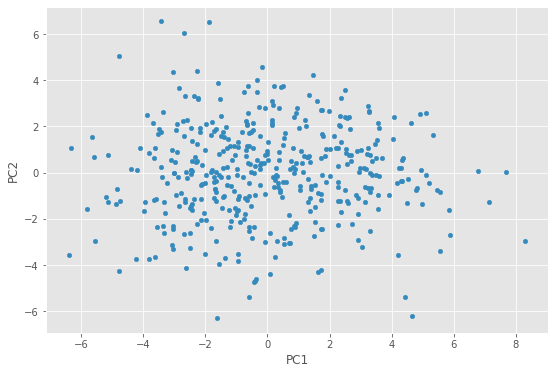

In [58]:
nuevo2.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

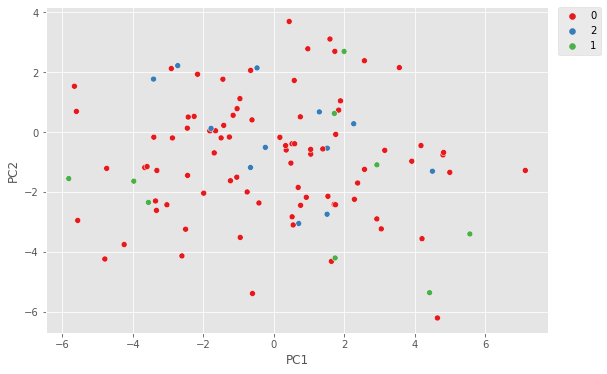

In [59]:
sns.scatterplot(data=nuevo2,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [60]:
#indices2 = nuevo2[nuevo2["haplogrupos"]!="0"].index

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

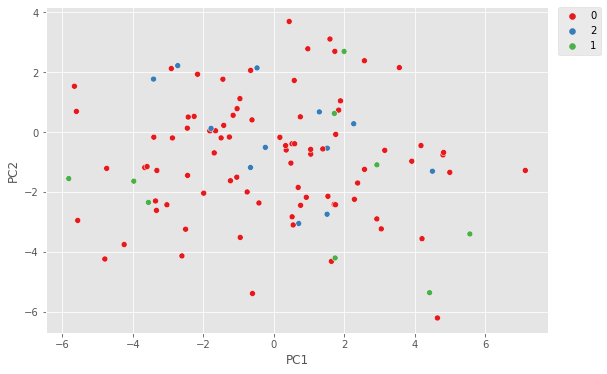

In [61]:
sns.scatterplot(data=nuevo2,x=nuevo2.PC1, y=nuevo2.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [62]:
model_pca.explained_variance_ratio_

array([3.66760728e-01, 2.19674527e-01, 1.21226496e-01, 7.13598782e-02,
       5.44634344e-02, 5.27311542e-02, 4.95109286e-02, 3.09393326e-02,
       1.79486570e-02, 1.36116002e-02, 6.42903230e-04, 3.91488030e-04,
       2.20745840e-04, 1.72664653e-04, 1.33633328e-04, 9.89498720e-05,
       5.85564116e-05, 3.06936492e-05, 2.36293978e-05])

### Bastón quebrado

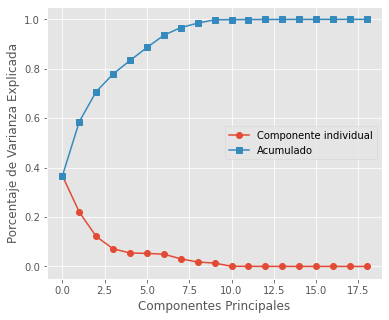

In [63]:
plt.figure(figsize=(6,5))

plt.plot(model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

## Prueba TSNE

In [64]:
from sklearn.manifold import TSNE

In [65]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(data_std)

In [66]:
data_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.134438,1.216377,0.350529,0.425324,0.401795,0.794755,0.520965,-0.390626,-0.084515,0.856508,2.185259,0.196783,0.432919,1.385888,-1.126898,0.556346,0.267887,0.632387,-0.991902
1,-0.563472,-0.835657,-0.820108,-1.004653,-1.010947,-0.411139,-0.488972,-0.390626,-0.084515,0.856508,-0.728884,-0.668713,1.201004,-0.238057,0.591529,1.184606,-0.948678,-0.675756,0.996406
2,-0.103793,0.097086,0.231918,0.153279,0.353080,-0.202848,-0.084997,-0.390626,-0.084515,0.856508,0.300454,-0.251693,-0.926155,0.012396,-0.793835,-0.659197,0.458683,0.237765,-0.857597
3,0.304810,1.109778,-0.830422,-0.397785,-0.840444,-1.463555,1.093262,-0.390626,-0.084515,-1.167531,1.379402,1.465046,-1.024030,2.325522,3.168727,-2.023956,-0.287291,2.914587,2.454152
4,-0.236589,-0.489210,-0.350822,-0.481490,-0.629344,0.378173,0.015997,-0.390626,-0.084515,0.856508,-0.512359,-0.444741,1.741688,-0.239833,0.249185,1.577592,-1.038809,-0.806690,0.796705


In [67]:
nuevo3= pd.DataFrame(proj_tsne)

In [68]:
nuevo3.head()

,0,1
0,-20.783741,7.656449
1,-2.762976,-10.293843
2,-6.749123,1.150071
3,6.654214,9.134555
4,-3.616528,-9.976585


In [69]:
nuevo4= pd.concat([nuevo3, data["haplogrupos"]], axis=1)

In [70]:
nuevo4.columns = ["X","Y","haplogrupos"]

In [71]:
nuevo4.head()

,X,Y,haplogrupos
0,-20.783741,7.656449,0
1,-2.762976,-10.293843,2
2,-6.749123,1.150071,NaN
3,6.654214,9.134555,NaN
4,-3.616528,-9.976585,2


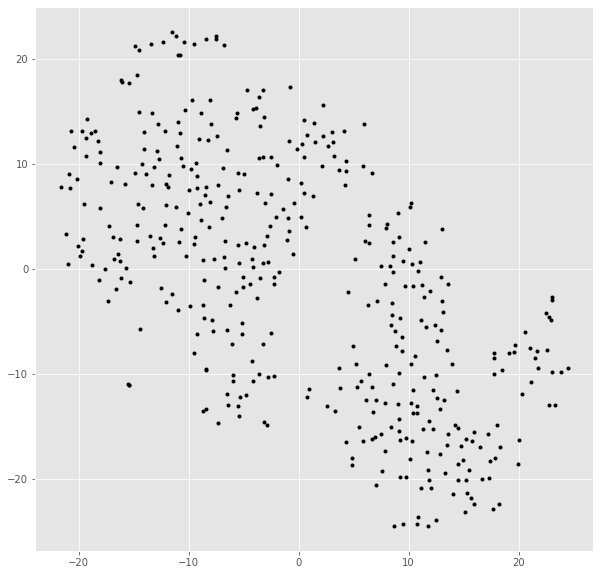

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne[:, 0]
coord_y = proj_tsne[:, 1]
ax.plot(coord_x, coord_y, '.k')    

<AxesSubplot:xlabel='X', ylabel='Y'>

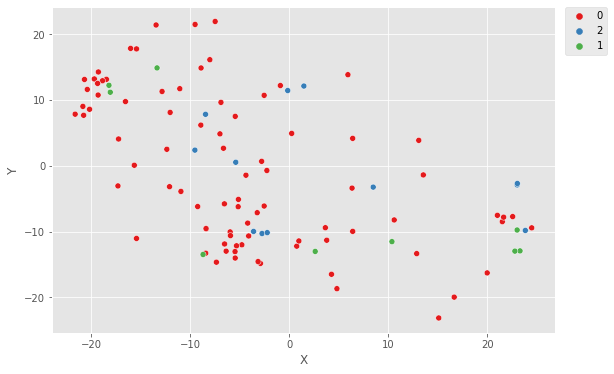

In [73]:
sns.scatterplot(data=nuevo4,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modelos clasificación

In [74]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score

## CART con oversampling target HAPLOGRUPOS

In [75]:
from sklearn.model_selection import train_test_split

In [85]:
dataNa = data.dropna()

In [86]:
dataNa.shape

(106, 23)

In [87]:
newX = dataNa[['AE','LE','AT','LT','AA','LA','NV','Morfotipo_1','Morfotipo_2','Labio','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
newy = dataNa['haplogrupos']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(newX,newy,stratify = dataNa['haplogrupos'],random_state=0)

In [89]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (79, 19)
Testeo: (27, 19)

Clases train:
0    0.797468
2    0.113924
1    0.088608
Name: haplogrupos, dtype: float64

Clases test:
0    0.814815
2    0.111111
1    0.074074
Name: haplogrupos, dtype: float64


### OverSampling

In [90]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
1    63
0    63
2     9
Name: haplogrupos, dtype: int64

Composición del test set:
0    22
2     3
1     2
Name: haplogrupos, dtype: int64


In [91]:
X_train_os2,y_train_os2=oversampler.fit_resample(X_train_os,y_train_os);

print('Composición del training set:')
print(y_train_os2.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
1    63
0    63
2    63
Name: haplogrupos, dtype: int64

Composición del test set:
0    22
2     3
1     2
Name: haplogrupos, dtype: int64


## CART

### CART con variables originales oversampleadas

In [92]:
clf_dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
clf_dt = clf_dt.fit(X_train_os2,y_train_os2)

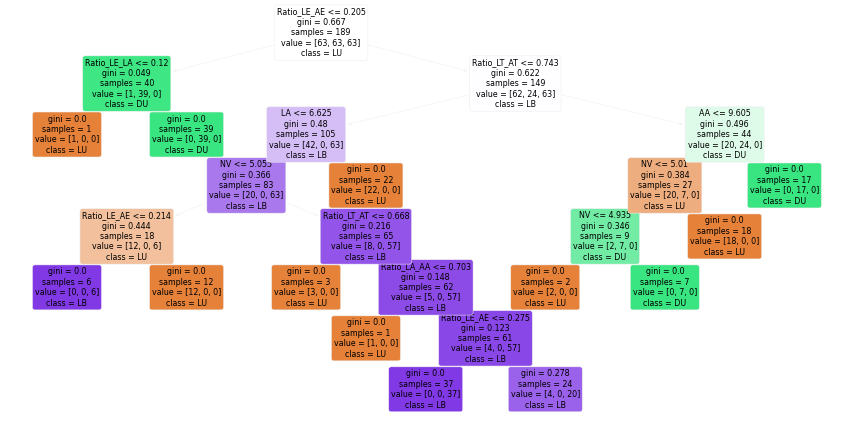

In [93]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["LU","DU", "LB"], 
          feature_names=X_train_os2.columns); 

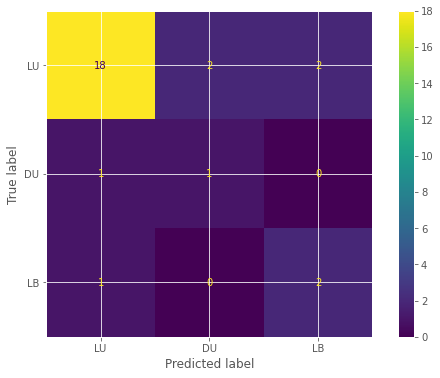

In [94]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["LU","DU","LB"])

In [95]:
accuracy_score(y_test, clf_dt.predict(X_test))

0.7777777777777778

### CART con variables de PCA target HAPLOGRUPOS

In [96]:
nuevo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          423 non-null    float64
 1   PC2          423 non-null    float64
 2   PC3          423 non-null    float64
 3   PC4          423 non-null    float64
 4   PC5          423 non-null    float64
 5   PC6          423 non-null    float64
 6   PC7          423 non-null    float64
 7   PC8          423 non-null    float64
 8   PC9          423 non-null    float64
 9   PC10         423 non-null    float64
 10  PC11         423 non-null    float64
 11  PC12         423 non-null    float64
 12  PC13         423 non-null    float64
 13  PC14         423 non-null    float64
 14  PC15         423 non-null    float64
 15  PC16         423 non-null    float64
 16  PC17         423 non-null    float64
 17  PC18         423 non-null    float64
 18  CP19         423 non-null    float64
 19  haplogru

In [97]:
nuevoPCA = nuevo2.dropna()

In [98]:
nuevoPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   PC10         106 non-null    float64
 10  PC11         106 non-null    float64
 11  PC12         106 non-null    float64
 12  PC13         106 non-null    float64
 13  PC14         106 non-null    float64
 14  PC15         106 non-null    float64
 15  PC16         106 non-null    float64
 16  PC17         106 non-null    float64
 17  PC18         106 non-null    float64
 18  CP19         106 non-null    float64
 19  haplogru

In [99]:
X_PCA = nuevoPCA[['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6']]
y_PCA = nuevoPCA['haplogrupos']

In [100]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevoPCA['haplogrupos'],random_state=0)

In [101]:
clf_dt = DecisionTreeClassifier(max_depth = 4, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

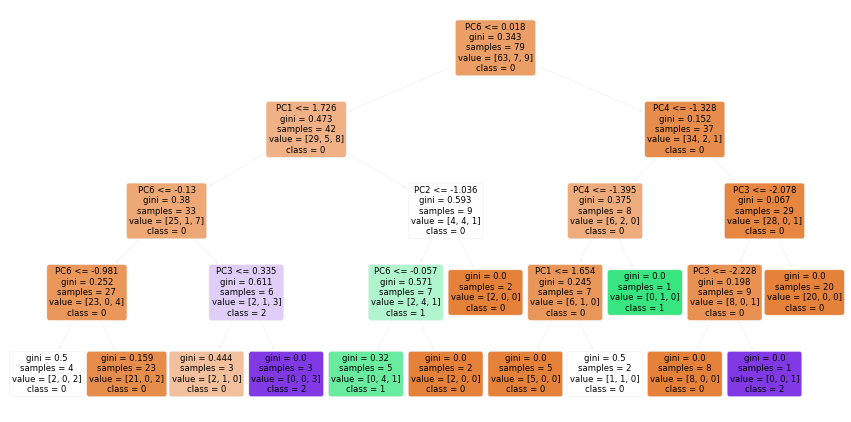

In [102]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns); 

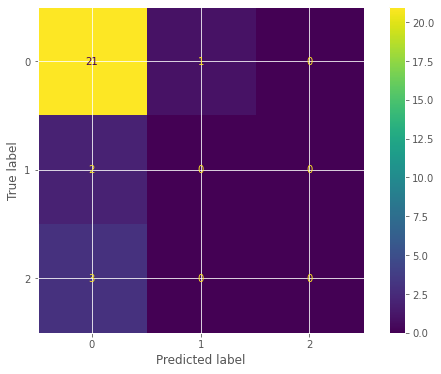

In [103]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [104]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.7777777777777778

## XGBoost

In [105]:
from xgboost import XGBClassifier


In [106]:
y_train_PCA = y_train_PCA.astype("int")

In [107]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train_PCA)
y_train_PCA = le.transform(y_train_PCA)

LabelEncoder()

In [108]:
xgboost = XGBClassifier()

In [109]:
clf_XGB = xgboost.fit(X_train_PCA,y_train_PCA)

In [110]:
accuracy_score(le.transform(y_test_PCA), xgboost.predict(X_test_PCA))

ValueError: y contains previously unseen labels: '2'